<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Nearest%20Neighbor/NearestNeighbor_AIML_CEP_Oct31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\large{\text{Nearest Neighbor Classification}}$

We assume that the training features are from some input space $\mathcal{X} \subseteq {\mathbb{R}}^d$. Note that $\mathcal{X}$ is a subset of the Euclidean space. Hence distance metrics used for Euclidean space can be used to compare the closeness of two points $x=(x_1,x_2,\ldots,x_d)$ and $z=(z_1,z_2,\ldots,z_d)$ in $\mathcal{X}$.   

Recall that the following metrics are some examples of distance metrics in $\mathcal{X}$:




*   $\ell_2$ distance between $x$ and $z$ given by: $\|x-z\|_2 = \sqrt{\sum_{i=1}^{d} (x_i - z_i)^2}$
*   $\ell_1$ distance between $x$ and $z$ given by: $\|x-z\|_1 = \sum_{i=1}^{d} |x_i - z_i|$
*   $\ell_\infty$ distance between $x$ and $z$ given by: $\|x-z\|_\infty = \max_{i \in \{1,2,\ldots,d\}} |x_i - z_i|$
*   $\ell_p$ distance between $x$ and $z$ given by: $\|x-z\|_p =  (\sum_{i=1}^{d} |x_i - z_i|^p)^\frac{1}{p}$, where $1 \leq p < \infty$.

Unlike previous algorithms that we have seen like SVM, Decision tree or logistic regression, nearest neighbor algorithm does not go for a model building activity immediately when the training data is available. 

Typically the model building activity using the training data set is $\textbf{inductive}$ in nature, since the model is induced using the training data. 

Nearest neighbor algorithm on the other hand is a $\textbf{lazy}$ learner in the sense that it waits until a test instance is available for inference. 

Recall that in algorithms like SVM, logistic regression and decision trees, the inference is a $\textbf{deductive}$ process since the label is deduced from the model. 

However in nearest neighbor algorithm, this deduction process is not carried out using a learned model as such. Instead the model is built and used on-the-fly to make the inference. 






Consider the data belonging to two classes as shown in the following figure.

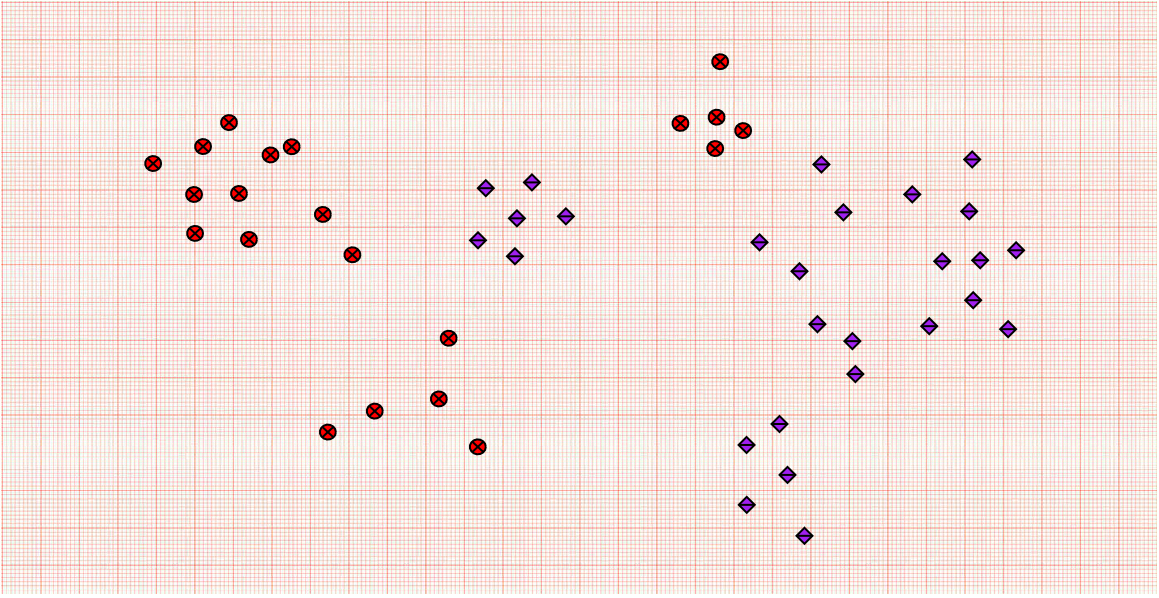

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/nearest_neighbor_binary_class_distribution.png'))
img

Consider the test data points which are given by different colored points. How do we classify these points? 

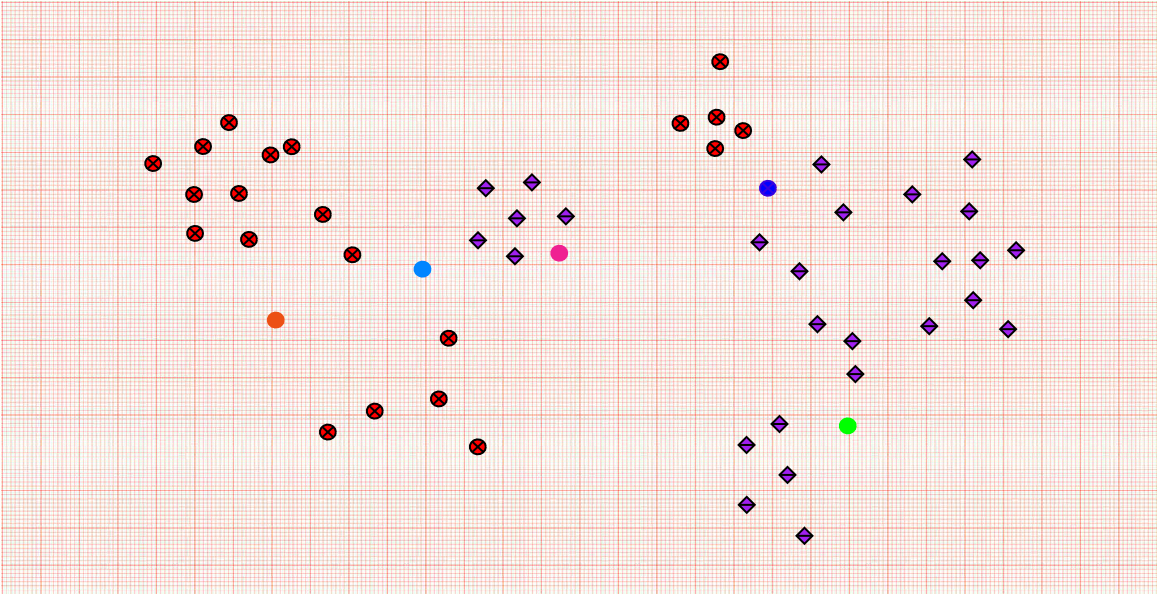

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/nearest_neighbor_binary_class_distribution_testdata.png'))
img

One idea to classify the test instances is to compute how close it is to the points of each class. 

If a test point is close to many points belonging to class $+1$, then we classify the test point to be of class $+1$. 

If on the other hand, if a test point is close to many points belonging to class $-1$, then we classify the test point to be of class $-1$. 

Note that the $\textbf{closeness}$ between two points is measured using the distance metrics we outlined above ($\textit{e.g. }$  $\ell_2, \ell_1, \ell_\infty, \ell_p$ distance metrics.)

${\textbf{Question:}}$ How many points should we use during the inference process? 


Typically, the closeness of the test data point is compared with each training data point and then the training data points are ranked according to their closeness to the test data point. 

Then among the top $k\geq 1$ closest training points, if the majority of the points are from class $c$, then the test data point is classified to be of that class $c$. 

This process is called $k$-nearest neighbor classification. 

${\textbf{Question:}}$ Can $k$ be even? 

${\textbf{Question:}}$ What can be a typical choice of $k$? 

$\large{\text{Algorithm for $k$-nearest neighbor classification}}$



*   $\textbf{Input:}$ Training data set $D=\{(x^i, y^i)\}_{i=1}^{n}$ where $x^i \in \mathcal{X} \subseteq {\mathbb{R}}^d$, $y^i \in \{+1,-1\}$, integer $k \geq 1$, test data point $\hat{x}$. 
*   Compute distances $d_i$ between each training point $x^i$ and $\hat{x}$ for $i \in \{1,2,\ldots,n\}$.  
*   Sort $d_i$ in non-decreasing order and collect in set $J$ the top $k$ indices $j$ of training points having the closest distances from $\hat{x}$.  
*   class($\hat{x}$) = $\begin{cases} +1 & \text{ if } |\{j \in J: y^j = +1\}| > |\{j \in J: y^j = -1\}| \\ -1 & \text{ if } |\{j \in J: y^j = -1\}| > |\{j \in J: y^j = +1\}| \end{cases}$


Note that we have used the notation $|A|$ to denote the cardinality of set $A$. 


In [ ]:
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package. 

from sklearn.datasets import load_digits #for loading digits dataset
from sklearn import tree #decision tree from scikit learn 

np.random.seed(1000) #for reproducibility
digits = load_digits()
#check the shape of digits data features
print('digits data shape:', digits.data.shape)
A = digits.data
#check the shape of digits target labels
print('digits target shape:', digits.target.shape)
#We can print first 5 samples of digits data and check 
print('Features of first five samples of digits data:')
print(A[0:5,])

digits data shape: (1797, 64)
digits target shape: (1797,)
Features of first five samples of digits data:
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.

In [ ]:
#How many labels does digits data have? 
#print the unique classes
print('unique classes: ',np.unique(digits.target))
n = digits.data.shape[0] #Number of data points or samples 
d = digits.data.shape[1] #Dimension of data points

unique classes:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#In the following code, we create a nx1 vector of target labels 
y = 1.0*np.ones([A.shape[0],1])
# print ('y',y)
for i in range(digits.target.shape[0]):
    if digits.target[i] == 3:
        y[i] = 1
    else:
        y[i] = -1

In [ ]:
#Create an index array 
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*n)
#Use the remaining 20% samples for testing 
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  1437 num_test:  360


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shape of train data labels')
print(train_label.shape)

shape of train data features:
(1437, 64)
shape of train data labels
(1437, 1)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shape of test data labels')
print(test_label.shape)

shape of test data features:
(360, 64)
shape of test data labels
(360, 1)


In [ ]:
#Consider a test data point
test_data_index = np.random.randint(0,num_test)
print('test data index:',test_data_index)
x_test = test_features[test_data_index]
y_test = test_label[test_data_index]
print('X test:',x_test, 'y test:',y_test)

test data index: 143
X test: [ 0.  0.  6. 14. 13.  4.  0.  0.  0.  4. 16. 11. 10. 15.  0.  0.  0.  9.
 11.  0. 12. 11.  0.  0.  0.  7. 11.  8. 16.  3.  0.  0.  0.  0. 13. 16.
 10.  0.  0.  0.  0.  0. 13. 13. 12.  9.  0.  0.  0.  0. 12.  8.  0. 15.
  1.  0.  0.  0.  5. 16. 16. 11.  0.  0.] y test: [-1.]


In [ ]:
k = 13 #number of nearest neighbors to be considered 

 

#compute distance between test data point and all training data points
distance_list = []
for i in range(num_train):
  distance_list.append(np.linalg.norm(train_features[i]- x_test, ord=np.inf))
#print(distance_list)

distance_arr = np.array(distance_list)

#sort the indices according to non-decreasing order of distances
index_sorted = np.argsort(distance_arr)

#print the indices of the top k closest points in training data 
print('indices of top k points:', index_sorted[0:k], 'labels of top k points:', train_label[index_sorted[0:k]])

if np.sum(train_label[index_sorted[0:k]])>0:
  pred_label = +1
else:
  pred_label = -1

print('actual label:',  y_test, 'predicted label:', pred_label)



indices of top k points: [1227 1329  378 1189  466  851 1145  120  179  389  695  365 1179] labels of top k points: [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
actual label: [-1.] predicted label: -1


When $k$ is a large number, then a weighted majority voting might be useful. 

In [ ]:
k = 11 #number of nearest neighbors to be considered 

 

#compute distance between test data point and all training data points
distance_list = []
for i in range(num_train):
  distance_list.append(np.linalg.norm(train_features[i]- x_test, ord=2))
#print(distance_list)

distance_arr = np.array(distance_list)

#sort the indices according to non-decreasing order of distances
index_sorted = np.argsort(distance_arr)

#print the indices of the top k closest points in training data 
print('indices of top k points:', index_sorted[0:k], 'labels of top k points:', train_label[index_sorted[0:k]])


top_k_labels = train_label[index_sorted[0:k]]
index_class_1,_ = np.where(top_k_labels == 1)
index_class_minus1,_ = np.where(top_k_labels == -1)

# print(index_sorted[0:k])
# print(index_sorted[index_class_1])
# print(top_k_labels[index_class_1])
#print(index_class_1)
#print(index_class_minus1)
#print(top_k_labels[index_class_1].ravel())


weighted_score_class_1 = -np.inf
weighted_score_class_minus1 = -np.inf

if len(index_class_1)>0:
  weighted_score_class_1 = np.dot(1./distance_arr[index_sorted[index_class_1]],train_label[index_sorted[index_class_1]])

if len(index_class_minus1)>0:
  weighted_score_class_minus1 = np.dot(1./distance_arr[index_sorted[index_class_minus1]],train_label[index_sorted[index_class_minus1]])

print('weighted score for class +1:',weighted_score_class_1, 'weighted score for class -1:',weighted_score_class_minus1)

if weighted_score_class_1 > weighted_score_class_minus1:
  pred_label = +1
else:
  pred_label = -1

print('actual label:',  y_test, 'predicted label:', pred_label)



indices of top k points: [534 861 223 266  62 714 990  38 250 935 202 718 448 284 733] labels of top k points: [[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
weighted score for class +1: -inf weighted score for class -1: [-0.78343201]
actual label: [-1.] predicted label: -1


$\large{\text{Exercise}}$

1. On the digits data set, extend the $k$-nearest neighbor algorithm so that you can perform multi-class classification with all 10 classes. What values of $k$ give you a train accuracy of more than 80% ? Explain. 
2. Try $k$-nearest neighbors (weighted and unweighted) on breast cancer wisconsin dataset from $\texttt{scikit learn}$ with $k\in \{1,3,5,7,8,11, 13\}$. Record and explain your observations. 
